
# Assignment: Linear Regression, Logistic Regression, and K-Means (From Scratch)

**Instructions**
- You are NOT allowed to use `scikit-learn` for model implementation, scaling.
- You may use it for implementation of clustering
- You may use: `numpy`, `matplotlib`, and standard Python libraries only.
- Every step (scaling, loss, gradients, optimization) must be implemented manually.
- Clearly comment your code and explain your reasoning in Markdown cells.


## Question 1: Linear Regression from Scratch (with Standardization and Regularization)

You are given a dataset `(X, y)`.

### Tasks
1. Implement **StandardScaler manually**:
   - Compute mean and standard deviation for each feature.
   - Standardize the features.
2. Implement **Linear Regression using Gradient Descent**.
3. Add **L2 Regularization (Ridge Regression)**.
4. Plot:
   - Loss vs iterations
   - True vs predicted values

Do NOT use `sklearn`.


In [ ]:

# Implement StandardScaler manually ,  first read about it, how it works and then implement it
class StandardScalerManual:
    def fit(self, X):
        pass

    def transform(self, X):
        pass

    def fit_transform(self, X):
        pass


In [ ]:

# Implement Linear Regression from scratch, here you have to also construct the regulization term coefficient of which will be
# denoted by l2_lambda
# try to implement L1 regularization or atlease read about it and where it is used
class LinearRegressionManual:
    def __init__(self, lr=0.01, epochs=1000, l2_lambda=0.0):
        pass

    def fit(self, X, y):
        pass

    def predict(self, X):
        pass


In [11]:
#IMP!!
# RUN MY CODE IN GOOGLE COLAB ONLY AS WHEN I WAS TRYING TO RUN IT LOCALLY ON VSCODE IT WAS GIVING ME ERRORS (sorry for the inconvenience)

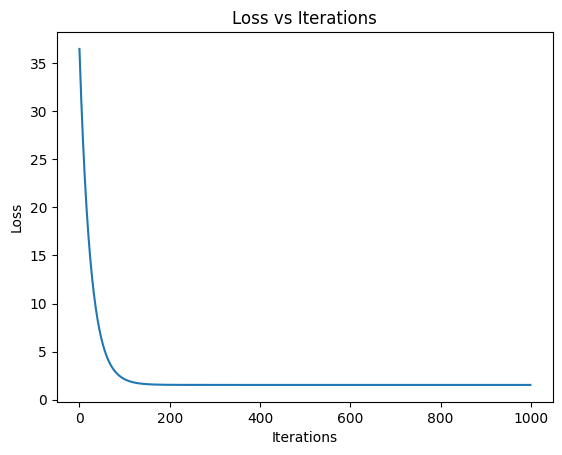

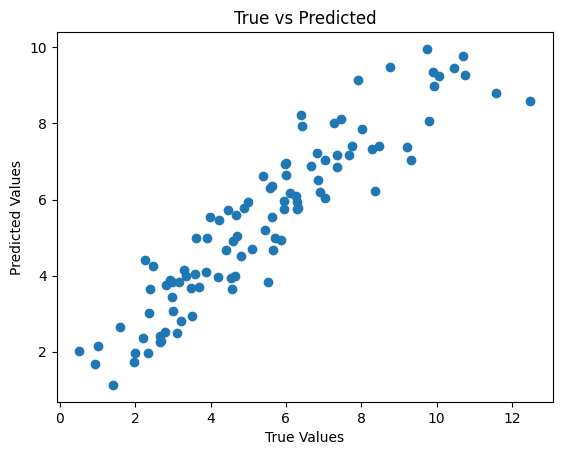

Weights: [1.1922144 1.8944244]
Bias: 5.440988844227391


In [15]:

import numpy as np
import matplotlib.pyplot as plt

class StandardScalerManual:

    def fit(self, X):
        """
        This method calculates mean and standard deviation for each feature
        (column-wise).
        """
        # Mean of each feature (axis=0 → column-wise)
        self.mean_ = np.mean(X, axis=0)

        # Standard deviation of each feature
        self.std_ = np.std(X, axis=0)

        return self

    def transform(self, X):
        """
        This method standardizes the data using: (X - mean) / std
        """
        # Adding small value (1e-8) to avoid division by zero
        return (X - self.mean_) / (self.std_ + 1e-8)

    def fit_transform(self, X):
        """
        This method does both:
        1. Fit (compute mean & std)
        2. Transform (standardize)
        """
        self.fit(X)
        return self.transform(X)



#Implementing Linear regression
class LinearRegressionManual:
    def __init__(self, lr=0.01, epochs=1000, l2_lambda=0.0):
        """
        lr is the learning rate
        epochs is number of gradient descent iterations
        l2_lambda is regularization strength
        """
        self.lr = lr
        self.epochs = epochs
        self.l2_lambda = l2_lambda

    def fit(self, X, y):
        """
        This trains the linear regression model using gradient descent
        """
        # Number of samples and features
        n_samples, n_features = X.shape

        # Initialize weights with zeros
        self.w = np.zeros(n_features)

        # Initialize bias with zero
        self.b = 0

        # Store loss values for plotting
        self.losses = []

        # Gradient Descent Loop
        for _ in range(self.epochs):
            # Forward pass
            y_pred = X @ self.w + self.b

            #Computing mean squared error
            mse = np.mean((y - y_pred) ** 2)

            # L2 regularization term
            l2_penalty = self.l2_lambda * np.sum(self.w ** 2)

            # Total loss
            loss = mse + l2_penalty

            # Save loss for plotting
            self.losses.append(loss)

            # Gradient w.r.t weights
            dw = (-2 / n_samples) * (X.T @ (y - y_pred)) \
                 + 2 * self.l2_lambda * self.w

            # Gradient w.r.t bias
            db = (-2 / n_samples) * np.sum(y - y_pred)


            # Update parameters
            self.w -= self.lr * dw
            self.b -= self.lr * db

    def predict(self, X):
        """
        Predicting output for given input X
        """
        return X @ self.w + self.b


#. Generating a random data set
# Fix random seed for reproducibility
np.random.seed(42)

# Generate random features (100 samples, 2 features)
X = np.random.rand(100, 2)

# Generate target values with noise
y = 4 * X[:, 0] + 7 * X[:, 1] + np.random.randn(100)


#Standardize features
scaler = StandardScalerManual()
X_scaled = scaler.fit_transform(X)

#Training  the model
model = LinearRegressionManual(
    lr=0.01,
    epochs=1000,
    l2_lambda=0.1
)

model.fit(X_scaled, y)


#Making predictions predictions
y_pred = model.predict(X_scaled)

#Ploting
plt.figure()
plt.plot(model.losses)
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Loss vs Iterations")
plt.show()


plt.figure()
plt.scatter(y, y_pred)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("True vs Predicted")
plt.show()

#Printing the parameters
print("Weights:", model.w)
print("Bias:", model.b)


## Question 2: Logistic Regression from Scratch (with Standardization and Regularization)

You are given a binary classification dataset.

### Tasks
1. Reuse your **manual StandardScaler**.
2. Implement **Logistic Regression using Gradient Descent**.
3. Use:
   - Sigmoid function
   - Binary Cross Entropy loss
4. Add **L2 Regularization**.
5. Report:
   - Training loss curve
   - Final accuracy

Do NOT use `sklearn`.


In [ ]:

#Implement sigmoid function as told in the lectures
def sigmoid(z):
    pass


In [ ]:

#Implement Logistic Regression from scratch and here also add the regularizaation term
class LogisticRegressionManual:
    def __init__(self, lr=0.01, epochs=1000, l2_lambda=0.0):
        pass

    def fit(self, X, y):
        pass

    def predict_proba(self, X):
        pass

    def predict(self, X):
        pass


Final Accuracy: 0.98


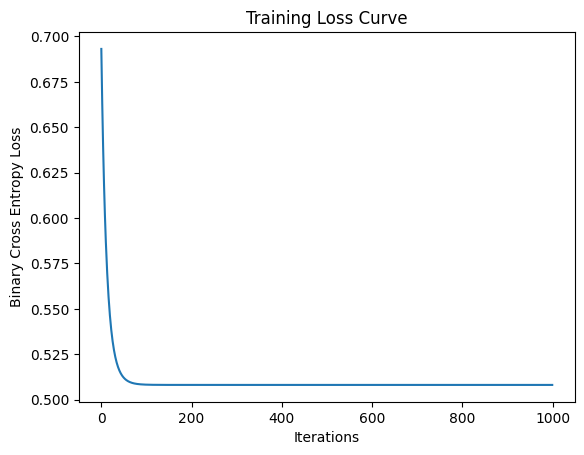

In [16]:

import numpy as np
import matplotlib.pyplot as plt


#Reused from Q1
class StandardScalerManual:

    def fit(self, X):
        """
        Compute mean and standard deviation for each feature
        """
        self.mean_ = np.mean(X, axis=0)
        self.std_ = np.std(X, axis=0)
        return self

    def transform(self, X):
        """
        Standardize features
        """
        return (X - self.mean_) / (self.std_ + 1e-8)

    def fit_transform(self, X):
        """
        Fit and transform in one step
        """
        self.fit(X)
        return self.transform(X)


#Sigmoid Function
def sigmoid(z):
    """
    Sigmoid activation function
    Maps real values to range (0, 1)
    """
    return 1 / (1 + np.exp(-z))


#Logistic Regression
class LogisticRegressionManual:

    def __init__(self, lr=0.01, epochs=1000, l2_lambda=0.0):
        """
        lr is the learning rate
        epochs is the number of iterations
        l2_lambda is the L2 regularization strength
        """
        self.lr = lr
        self.epochs = epochs
        self.l2_lambda = l2_lambda

    def fit(self, X, y):
        """
        Training logistic regression using gradient descent
        """
        n_samples, n_features = X.shape

        #Initialize weights and bias
        self.w = np.zeros(n_features)
        self.b = 0

        #Store loss values for plotting
        self.losses = []

        for _ in range(self.epochs):
            # Linear model
            z = X @ self.w + self.b

            #Appling sigmoid
            y_pred = sigmoid(z)

            # Binary Cross Entropy Loss
            epsilon = 1e-8
            bce_loss = -np.mean(
                y * np.log(y_pred + epsilon) +
                (1 - y) * np.log(1 - y_pred + epsilon)
            )

            #L2 regularization term
            l2_penalty = self.l2_lambda * np.sum(self.w ** 2)

            # Total loss
            loss = bce_loss + l2_penalty
            self.losses.append(loss)

            #Computing Gradients
            dw = (1 / n_samples) * (X.T @ (y_pred - y)) \
                 + 2 * self.l2_lambda * self.w

            db = (1 / n_samples) * np.sum(y_pred - y)

            # Updates parameters
            self.w -= self.lr * dw
            self.b -= self.lr * db

    def predict_proba(self, X):
        """
        Return probability estimates
        """
        z = X @ self.w + self.b
        return sigmoid(z)

    def predict(self, X):
        """
        Convert probabilities to class labels
        """
        y_prob = self.predict_proba(X)
        return (y_prob >= 0.5).astype(int)





#Generating dataset
np.random.seed(42)

# Generate random features
X = np.random.randn(200, 2)

#True weights (unknown to model)
true_w = np.array([2, -3])
true_b = 0.5

#Generate probabilities
probs = sigmoid(X @ true_w + true_b)

#Generate binary labels
y = (probs >= 0.5).astype(int)

#Standardize features
scaler = StandardScalerManual()
X_scaled = scaler.fit_transform(X)

#Train Logistic Regression
model = LogisticRegressionManual(
    lr=0.1,
    epochs=1000,
    l2_lambda=0.1
)

model.fit(X_scaled, y)

#Predictions
y_pred = model.predict(X_scaled)

# Calculting Accuracy
accuracy = np.mean(y_pred == y)
print("Final Accuracy:", accuracy)

# Plotting
plt.figure()
plt.plot(model.losses)
plt.xlabel("Iterations")
plt.ylabel("Binary Cross Entropy Loss")
plt.title("Training Loss Curve")
plt.show()


## Question 3: K-Means Clustering from Scratch (Matrix Clustering)

You are given a **random matrix** `M` of shape `(n, m)`.

### Tasks
Implement K-Means clustering **from scratch** such that:

1. Input:
   - A random matrix `M`
   - Number of clusters `k`
2. Output:
   - `assignment_table`: a matrix of same shape as `M`, where each element stores the **cluster label**
   - `cookbook`: a dictionary (hashmap) where:
     - Key = cluster index
     - Value = list of **positions (i, j)** belonging to that cluster
   - `centroids`: array storing centroid values

You must cluster **individual elements**, not rows.


In [17]:

# Implement K-Means for matrix elements
#CAN USE SK-LEARN FOR THIS TASK AS THIS TASK WILL HELP US DIRECTLY IN OUR PROJECT !
def kmeans_matrix(M, k, max_iters=100):
    '''
    Returns:
    assignment_table: same shape as M, contains cluster labels
    cookbook: dict -> cluster_id : list of (i, j) positions
    centroids: numpy array of centroid values
    '''
    pass


In [18]:
import numpy as np


# K-Means Clustering for matrix elments (not rows)
def kmeans_matrix(M, k, max_iters=100):
    """
    Parameters:
    M--->Input matrix of shape (n, m)
    k---->Number of clusters
    max_iters--->Maximum number of iterations

    Returns:
    assignment_table-->Matrix of same shape as M with cluster labels
    cookbook------>Dictionary {cluster_id: [(i, j), ...]}
    centroids----->Numpy array of centroid values
    """

    #Flattening the  matrix
    #We treat every element as an individual data point
    #Storing (value, (i,j)) pairs
    n, m = M.shape
    values = []
    positions = []

    for i in range(n):
        for j in range(m):
            values.append(M[i, j])
            positions.append((i, j))

    values = np.array(values)  # shape: (n*m,)


    #Initialize centroids
    #Randomly choose k values from matrix
    np.random.seed(42)
    centroids = np.random.choice(values, size=k, replace=False)


    #K-Means Iterations
    for _ in range(max_iters):

        #Dictionary to store cluster assignments
        clusters = {i: [] for i in range(k)}


        #Assigning
        for idx, val in enumerate(values):

            #Compute distance from each centroid
            distances = np.abs(val - centroids)

            # Assign to closest centroid
            cluster_id = np.argmin(distances)

            #Store index of the value
            clusters[cluster_id].append(idx)

        #Updating

        new_centroids = np.zeros(k)

        for cluster_id in range(k):
            if clusters[cluster_id]:  # avoid empty cluster
                cluster_values = values[clusters[cluster_id]]
                new_centroids[cluster_id] = np.mean(cluster_values)
            else:
                #If cluster empty, keep old centroid
                new_centroids[cluster_id] = centroids[cluster_id]


        # Checking convergence
        if np.allclose(centroids, new_centroids):
            break

        centroids = new_centroids

    #Building assignment table
    assignment_table = np.zeros((n, m), dtype=int)

    for cluster_id, indices in clusters.items():
        for idx in indices:
            i, j = positions[idx]
            assignment_table[i, j] = cluster_id


    #Building cookbook dictionary
    cookbook = {i: [] for i in range(k)}

    for cluster_id, indices in clusters.items():
        for idx in indices:
            cookbook[cluster_id].append(positions[idx])

    return assignment_table, cookbook, centroids


#Creating a random matrix
np.random.seed(0)
M = np.random.randint(0, 100, size=(5, 5))

# Number of clusters
k = 3

# Runing K-Means
assignment_table, cookbook, centroids = kmeans_matrix(M, k)


print("Input Matrix M:\n", M)
print("\nAssignment Table:\n", assignment_table)
print("\nCentroids:\n", centroids)
print("\nCookbook (cluster → positions):")
for cluster_id, positions in cookbook.items():
    print(f"Cluster {cluster_id}: {positions}")


Input Matrix M:
 [[44 47 64 67 67]
 [ 9 83 21 36 87]
 [70 88 88 12 58]
 [65 39 87 46 88]
 [81 37 25 77 72]]

Assignment Table:
 [[1 1 2 2 2]
 [0 2 0 1 2]
 [2 2 2 0 1]
 [2 1 2 1 2]
 [2 1 0 2 2]]

Centroids:
 [16.75       43.85714286 77.42857143]

Cookbook (cluster → positions):
Cluster 0: [(1, 0), (1, 2), (2, 3), (4, 2)]
Cluster 1: [(0, 0), (0, 1), (1, 3), (2, 4), (3, 1), (3, 3), (4, 1)]
Cluster 2: [(0, 2), (0, 3), (0, 4), (1, 1), (1, 4), (2, 0), (2, 1), (2, 2), (3, 0), (3, 2), (3, 4), (4, 0), (4, 3), (4, 4)]



## Submission Guidelines
- Submit the completed `.ipynb` file.
- Clearly label all plots and outputs.
- Code readability and correctness matter.
- Partial credit will be given for logically correct implementations.

**Bonus**
- Compare convergence with and without standardization.
- Try different values of regularization strength.
